<a href="https://colab.research.google.com/github/Kedar-P-Deshmukh/AirBnb_Booking_EDA_Project/blob/main/AirBnb_EDA_Project_By_KedarDeshmukh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link text](https://)# **Project Name**    - AirBnb_EDA_Project



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Individual's Name -**  Kedar Deshmukh


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [56]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [57]:
%pip install haversine
import haversine as hs
from haversine import Unit

### Dataset Loading

In [58]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/AlmaBetter_Data_Science/Module 2/Airbnb NYC 2019.csv'
read_airbnb_data = pd.read_csv(path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [59]:
# Dataset First Look
read_airbnb_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### Dataset Rows & Columns count

In [60]:
# Dataset Rows & Columns count
read_airbnb_data.shape

(48895, 16)

### Dataset Information

In [61]:
# Dataset Info
read_airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [62]:
# Dataset Duplicate Value Count
read_airbnb_data.duplicated().sum()

0

#### Missing Values/Null Values

In [63]:
# Missing Values/Null Values Count
read_airbnb_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<BarContainer object of 16 artists>

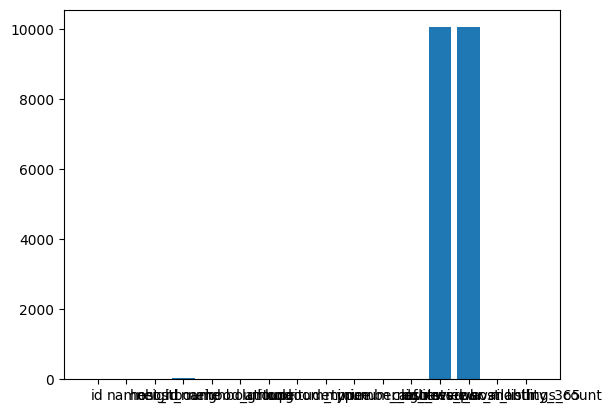

In [64]:
# Visualizing the missing values
plt.bar(read_airbnb_data.isnull().sum().index,read_airbnb_data.isnull().sum().values)

In [65]:
#Data cleaning
airbnb_data = read_airbnb_data.drop(columns=['last_review','reviews_per_month'])

airbnb_data.fillna(value={'name':'unnamed','host_name':'unknown'}, inplace=True)
airbnb_data.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [66]:
# Dataset Columns
airbnb_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [67]:
# Dataset Describe
airbnb_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [68]:
# Check Unique Values for each variable.
airbnb_data.nunique()

id                                48895
name                              47906
host_id                           37457
host_name                         11453
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [69]:
airbnb_data.groupby("name").filter(lambda x: len(x) > 1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
73,17693,"HARLEM, NEW YORK WELCOMES YOU!!",68428,Tye And Etienne,Manhattan,Washington Heights,40.83139,-73.94095,Private room,65,2,49,2,336
123,27883,East Village Sanctuary,120223,Jen,Manhattan,East Village,40.72245,-73.98527,Entire home/apt,100,4,25,1,0
171,44096,Room with a View,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,3,353
267,64015,Prime East Village 1 Bedroom,146944,David,Manhattan,East Village,40.72807,-73.98594,Entire home/apt,200,3,0,1,0
321,77765,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73749,-73.95292,Private room,179,3,36,28,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48684,36382847,Comfort home,266211707,Yan,Brooklyn,Sunset Park,40.64439,-74.01816,Private room,185,1,0,2,177
48735,36412461,"Sunny, Cozy, Private Room In The Heart of Bush...",147515897,Flávia,Brooklyn,Bushwick,40.70366,-73.92728,Private room,84,3,0,1,28
48759,36420404,Home Sweet Home,273656890,Liana,Manhattan,East Harlem,40.79266,-73.94740,Private room,50,1,0,1,81
48791,36427922,Home away from home,238163900,Lucy,Queens,Cambria Heights,40.68557,-73.72731,Private room,50,3,0,1,176


In [70]:
airbnb_data.loc[airbnb_data['name']=='Comfort home']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
48677,36381008,Comfort home,266211707,Yan,Brooklyn,Sunset Park,40.64454,-74.02010,Private room,185,1,0,2,175
48684,36382847,Comfort home,266211707,Yan,Brooklyn,Sunset Park,40.64439,-74.01816,Private room,185,1,0,2,177


In [71]:
airbnb_data.loc[airbnb_data['name']=='Home Sweet Home']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
23963,19326745,Home Sweet Home,131354448,Tammie,Queens,Flushing,40.75532,-73.81074,Entire home/apt,85,3,37,4,0
25399,20309089,Home Sweet Home,101776118,Jim,Brooklyn,Bay Ridge,40.62493,-74.02837,Entire home/apt,90,1,92,1,312
41148,32007251,Home Sweet Home,118502740,Mikyla,Queens,Jamaica,40.69289,-73.81079,Private room,120,2,0,1,0
41191,32042717,Home Sweet Home,65786143,Lisa,Brooklyn,Williamsburg,40.70572,-73.94501,Private room,90,2,11,1,83
43117,33452409,Home Sweet Home,92411,Karen,Manhattan,Harlem,40.82857,-73.95161,Entire home/apt,175,30,0,1,5
48759,36420404,Home Sweet Home,273656890,Liana,Manhattan,East Harlem,40.79266,-73.94740,Private room,50,1,0,1,81


In [72]:
airbnb_data.groupby("host_id").filter(lambda x: len(x) > 1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,4,188
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,3,314
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,2,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,3,365
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36


In [73]:
airbnb_data.loc[airbnb_data['host_id']==2787]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
10372,7937553,Riomaggiore Room. Queen Bedroom in Bklyn Townh...,2787,John,Brooklyn,Bensonhurst,40.60951,-73.97622,Private room,99,1,21,6,153
13583,10160215,Torre del Lago Room.,2787,John,Brooklyn,Gravesend,40.60755,-73.97410,Private room,79,1,17,6,174
13688,10267242,Cinque Terre Room. Clean and Quiet Queen Bedroom,2787,John,Brooklyn,Gravesend,40.60810,-73.97541,Private room,149,1,24,6,180
13963,10593675,"La Spezia room. Clean, quiet and comfortable bed",2787,John,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,79,1,15,6,180
21556,17263207,Brooklyn home. Comfort and clean. Liguria room.,2787,John,Brooklyn,Bensonhurst,40.60877,-73.97382,Private room,49,1,19,6,360


## 3. ***Data Wrangling***

### Data Wrangling Code

In [77]:
FinaceDist=(40.706763, -74.011177)
JFK=(40.64315, -73.78271)
LGA = (40.77603, -73.8722)
EWR = (40.69136, -74.1772)

def dist(row,loc):
  return(round(hs.haversine((row['latitude'], row['longitude']),loc )))



airbnb_data['from_FinanceDist'] = airbnb_data.apply(dist,loc=FinaceDist, axis=1)
airbnb_data['from_JFK'] = airbnb_data.apply(dist,loc=JFK, axis=1)
airbnb_data['from_LGA'] = airbnb_data.apply(dist,loc=LGA, axis=1)
airbnb_data['from_EWR'] = airbnb_data.apply(dist,loc=EWR, axis=1)
airbnb_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,from_FinanceDist,from_JFK,from_LGA,from_EWR
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,7,16,17,18
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,6,21,10,18
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,13,23,7,24
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,5,16,13,18
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,12,22,7,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9,6,15,13,19
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36,7,14,10,21
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27,13,24,8,24
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2,6,22,10,17


In [41]:
# Write your code to make your dataset analysis ready.
neighbourhood_group_df = airbnb_data.groupby('neighbourhood_group', as_index = False).agg({'id':'count','price':'mean'}).sort_values('id' , ascending=False)
neighbourhood_group_df

,neighbourhood_group,id,price
2,Manhattan,21661,196.875814
1,Brooklyn,20104,124.383207
3,Queens,5666,99.517649
0,Bronx,1091,87.496792
4,Staten Island,373,114.812332


In [40]:
neighbourhood_df = airbnb_data.groupby('neighbourhood', as_index = False).agg({'id':'count','price':'mean'}).sort_values('id' , ascending=False)
neighbourhood_df[:50]

,neighbourhood,id,price
214,Williamsburg,3920,143.802806
13,Bedford-Stuyvesant,3714,107.678244
94,Harlem,2658,118.974041
28,Bushwick,2465,84.800406
202,Upper West Side,1971,210.918316
95,Hell's Kitchen,1958,204.794178
64,East Village,1853,186.083108
201,Upper East Side,1798,188.948276
51,Crown Heights,1564,112.480179
127,Midtown,1545,282.719094


In [43]:
room_type_df = airbnb_data.groupby('room_type', as_index = False).agg({'id':'count','price':'mean'}).sort_values('id' , ascending=False)
room_type_df

,room_type,id,price
0,Entire home/apt,25409,211.794246
1,Private room,22326,89.780973
2,Shared room,1160,70.127586


In [45]:
minimum_nights_df = airbnb_data.groupby('minimum_nights', as_index = False).agg({'id':'count','price':'mean'}).sort_values('id' , ascending=False)
minimum_nights_df[:20]

,minimum_nights,id,price
0,1,12720,142.022877
1,2,11696,146.270178
2,3,7999,160.251281
29,30,3760,182.563564
3,4,3303,161.191644
4,5,3034,157.310811
6,7,2058,141.192906
5,6,752,170.417553
13,14,562,123.622776
9,10,483,133.884058


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***